In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
print(data.dtypes,'\n\n'); print('shape:',data.shape,'\n'); print('type:',type(data))

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object 


shape: (20640, 10) 

type: <class 'pandas.core.frame.DataFrame'>


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(20433, 10)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [11]:
X.shape, type(X), y.shape, type(y)

((20433, 9), pandas.core.frame.DataFrame, (20433,), pandas.core.series.Series)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [13]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

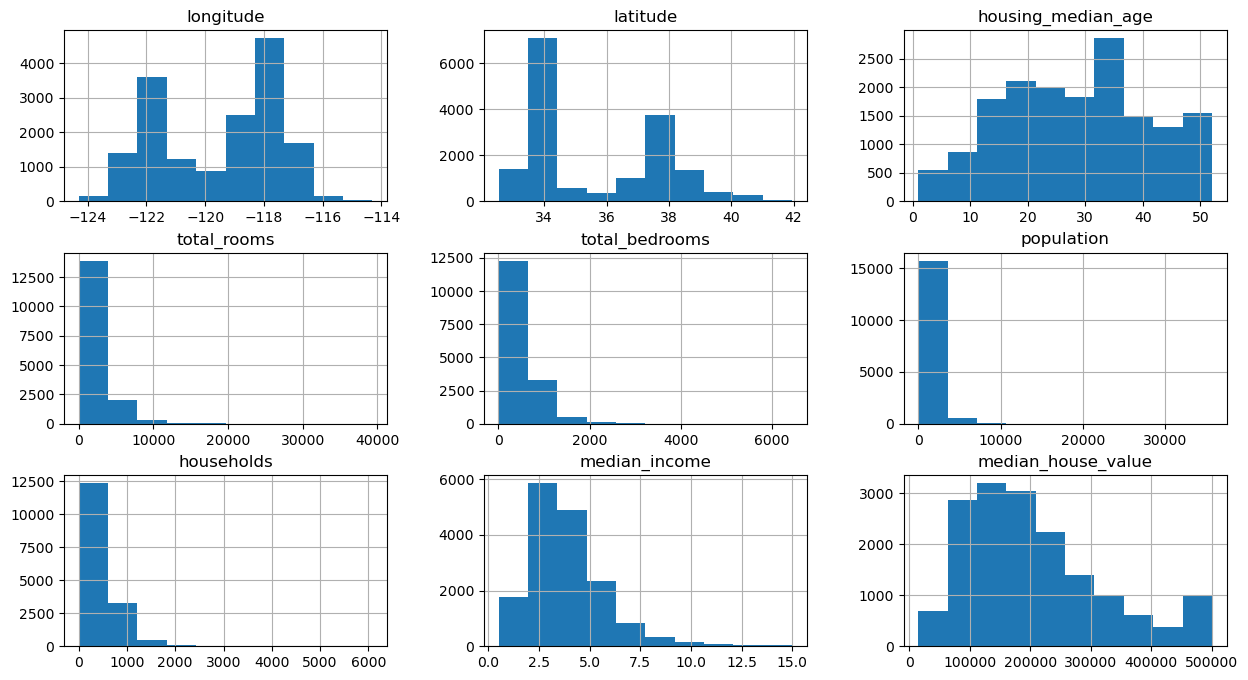

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924002,-0.110457,0.043233,0.065500,0.096172,0.052021,-0.010774,-0.041830
latitude,-0.924002,1.000000,0.013825,-0.034719,-0.063551,-0.105297,-0.068281,-0.083950,-0.148920
housing_median_age,-0.110457,0.013825,1.000000,-0.360371,-0.317366,-0.293588,-0.300003,-0.121531,0.103255
total_rooms,0.043233,-0.034719,-0.360371,1.000000,0.930586,0.852306,0.918920,0.200362,0.136543
total_bedrooms,0.065500,-0.063551,-0.317366,0.930586,1.000000,0.872636,0.979080,-0.007550,0.051248
population,0.096172,-0.105297,-0.293588,0.852306,0.872636,1.000000,0.903340,0.007110,-0.023457
households,0.052021,-0.068281,-0.300003,0.918920,0.979080,0.903340,1.000000,0.014540,0.067021
median_income,-0.010774,-0.083950,-0.121531,0.200362,-0.007550,0.007110,0.014540,1.000000,0.689401
median_house_value,-0.041830,-0.148920,0.103255,0.136543,0.051248,-0.023457,0.067021,0.689401,1.000000


<Axes: >

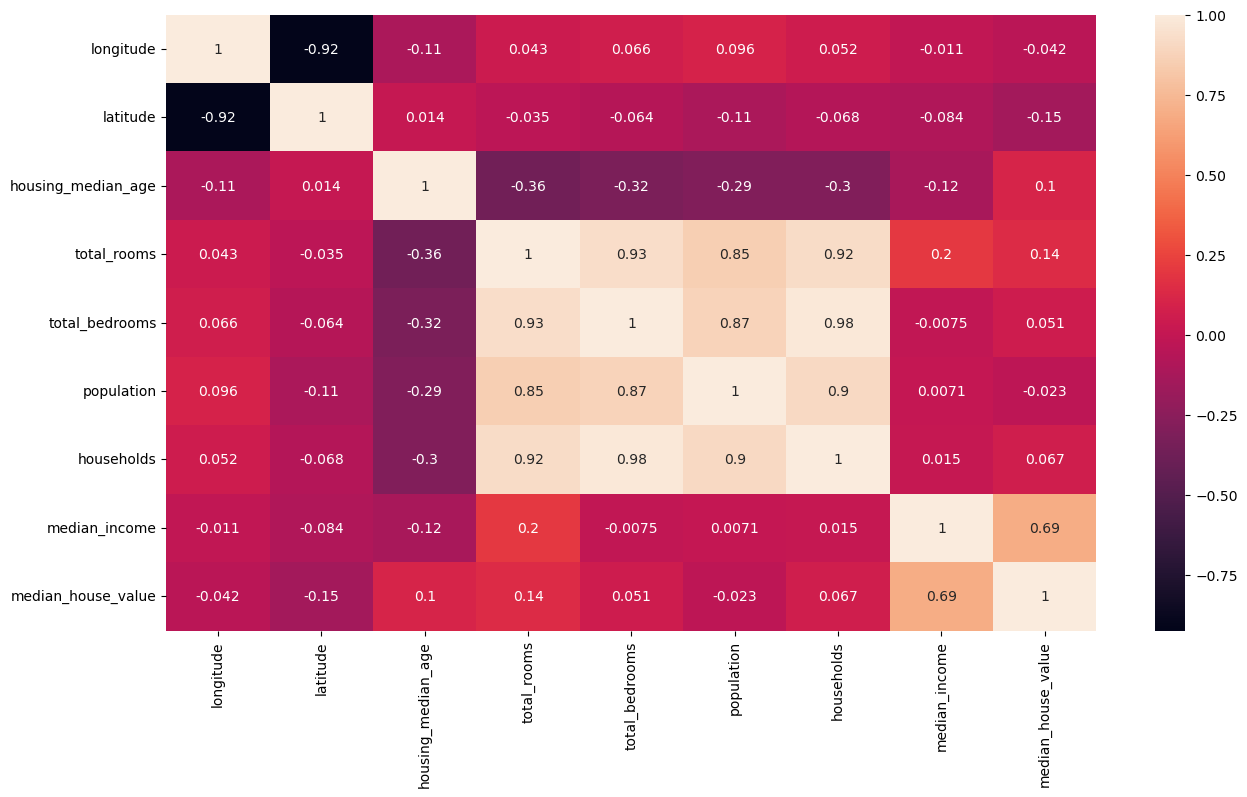

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [17]:
from math import e
print(e)
print(np.log(e))

2.718281828459045
1.0


In [18]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

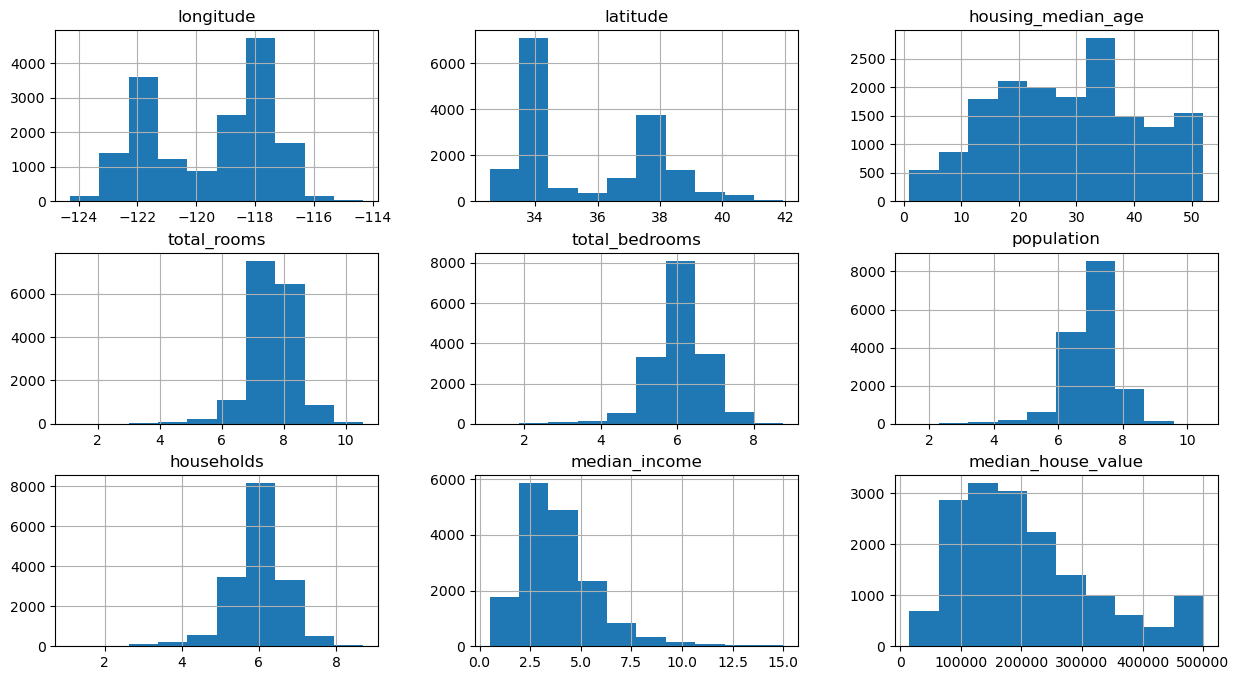

In [19]:
train_data.hist(figsize=(15,8))

In [20]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7177
INLAND        5206
NEAR OCEAN    2115
NEAR BAY      1844
ISLAND           4
Name: ocean_proximity, dtype: int64

In [21]:
pd.get_dummies(train_data.ocean_proximity) #onehotencoding

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5580,1,0,0,0,0
11180,1,0,0,0,0
1668,0,0,0,1,0
10949,1,0,0,0,0
11439,0,0,0,0,1
...,...,...,...,...,...
4462,1,0,0,0,0
6734,1,0,0,0,0
10567,1,0,0,0,0
16686,1,0,0,0,0


In [22]:
train_data = train_data.drop(['ocean_proximity'],axis=1).join(pd.get_dummies(train_data.ocean_proximity))

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5580,-118.30,33.83,33.0,7.907284,6.493754,7.499977,6.495266,3.5473,226300.0,1,0,0,0,0
11180,-117.94,33.83,20.0,6.700731,5.262690,6.204558,5.153292,3.2500,350000.0,1,0,0,0,0
1668,-122.20,37.96,9.0,8.749415,6.870053,7.856320,6.815640,6.7741,310700.0,0,0,0,1,0
10949,-117.87,33.75,18.0,6.548219,5.545177,6.700731,5.402677,2.6635,162500.0,1,0,0,0,0
11439,-117.98,33.61,17.0,7.628031,5.676754,6.729824,5.666427,6.8939,383900.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,-118.18,34.10,8.0,7.018402,5.590987,6.077642,5.463832,4.9231,230900.0,1,0,0,0,0
6734,-118.10,34.12,49.0,8.238537,6.363028,7.379008,6.291569,6.3013,500001.0,1,0,0,0,0
10567,-117.74,33.73,18.0,5.796058,4.234107,5.971262,4.110874,4.1167,87500.0,1,0,0,0,0
16686,-120.61,35.12,16.0,7.421776,5.872118,6.841615,5.831882,2.5792,163800.0,1,0,0,0,0


<Axes: >

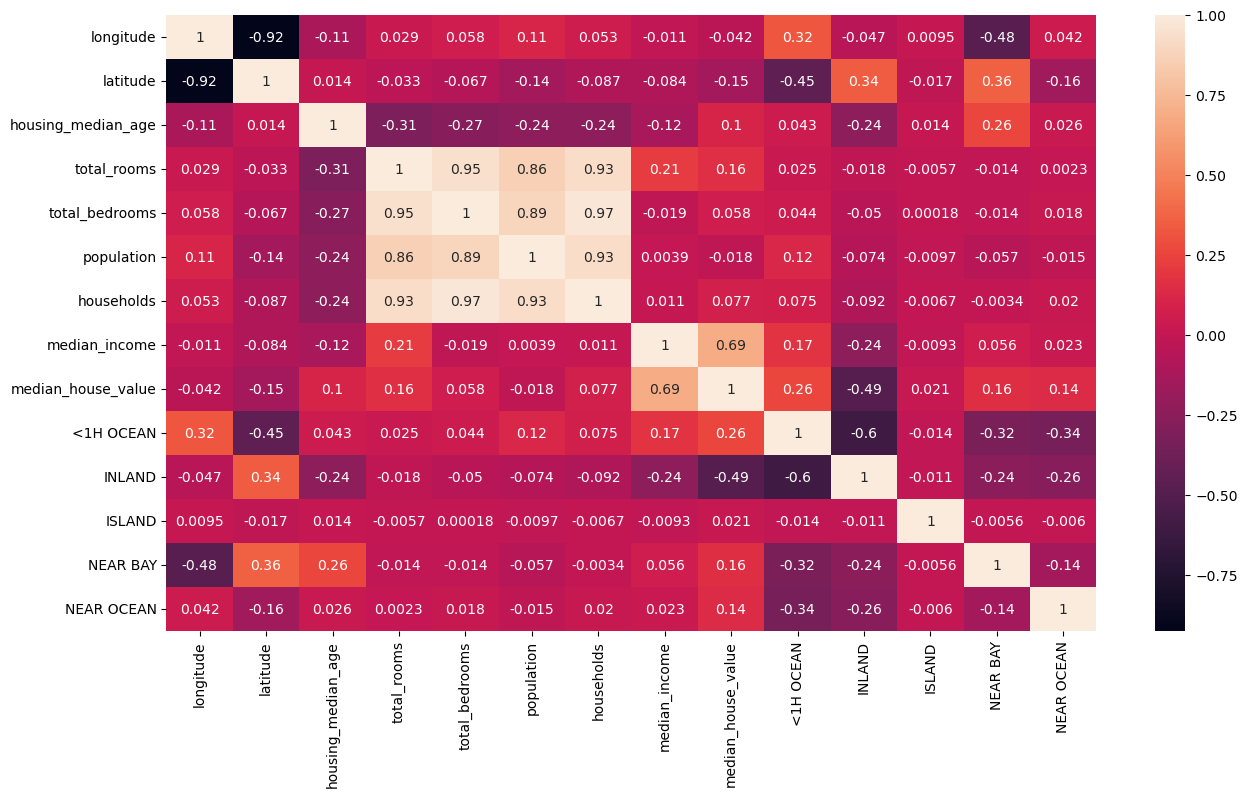

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

In [25]:
train_data=train_data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',
               'population','households','median_income','<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN','median_house_value']]

<Axes: xlabel='latitude', ylabel='longitude'>

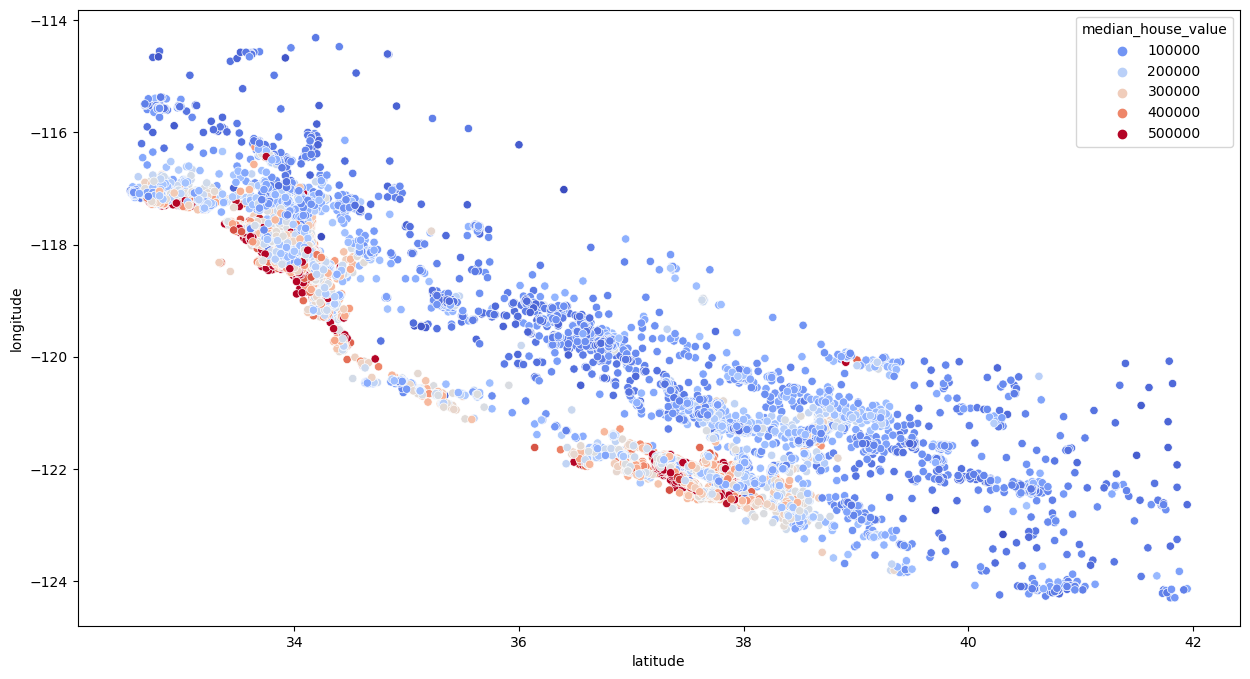

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = train_data, x="latitude", y="longitude", hue="median_house_value", palette="coolwarm")

In [27]:
train_data['bedroom_ratio'] = train_data.iloc[:,4:5].values / train_data.iloc[:,3:4].values
train_data['household_rooms'] = train_data.iloc[:,3:4].values / train_data.iloc[:,6:7].values

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 5580 to 2328
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   <1H OCEAN           16346 non-null  uint8  
 9   INLAND              16346 non-null  uint8  
 10  ISLAND              16346 non-null  uint8  
 11  NEAR BAY            16346 non-null  uint8  
 12  NEAR OCEAN          16346 non-null  uint8  
 13  median_house_value  16346 non-null  float64
 14  bedroom_ratio       16346 non-null  float64
 15  household_rooms     16346 non-null  float64
dtypes:

<Axes: >

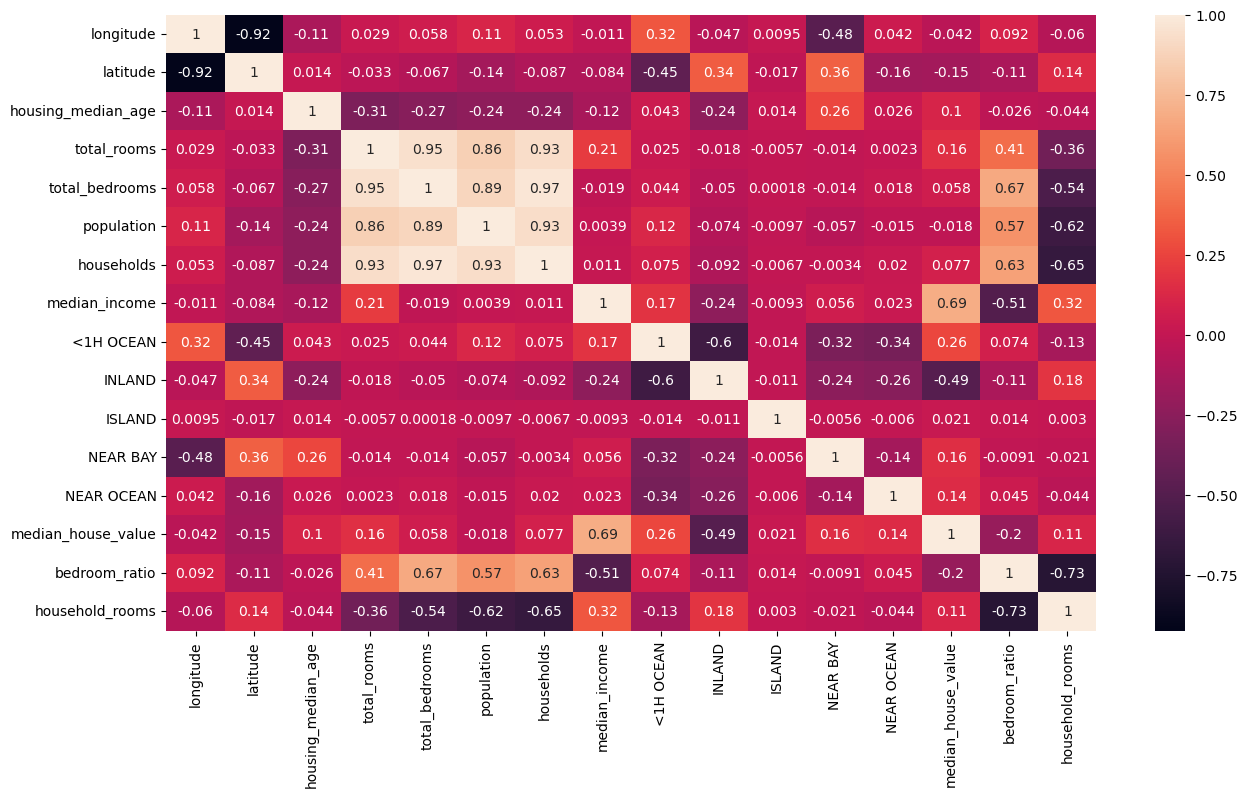

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True)

In [30]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

In [31]:
reg.fit(X_train, y_train)

LinearRegression()

In [32]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [33]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [34]:
reg.score(X_test,y_test)

0.6615164231392912

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train_s = scaler.fit_transform(X_train)

In [38]:
X_test_s = scaler.transform(X_test)

In [40]:
reg.fit(X_train_s, y_train)

LinearRegression()

In [41]:
reg.score(X_test_s, y_test)

0.6615164231392912

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [53]:
forest.score(X_test_s,y_test)

0.8146162187257339

In [61]:
#it takes between 10-15 minutes
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [100,200,300],
    "min_samples_split" : [2,4],
    "max_depth" : [None,4,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
best_forest = grid_search.best_estimator_
print(best_forest)

RandomForestRegressor(min_samples_split=4, n_estimators=300)


In [64]:
best_forest.score(X_test_s,y_test)

0.8147460085680382

In [84]:
best_forest.predict(X_test_s[0:5])

array([100217.87579365, 222934.98843915, 171758.34867725, 115383.36428571,
       135302.06719577])

In [77]:
y_test

1784      79700.0
10407    215000.0
7011     155600.0
11949    114100.0
20092    115800.0
           ...   
12510     98900.0
5518     361400.0
11815     55300.0
9422     350000.0
17278    340400.0
Name: median_house_value, Length: 4087, dtype: float64

In [85]:
import pickle

In [87]:
pickle.dump(best_forest, open('regmodel.pkl','wb'))

In [89]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [91]:
pickled_model.predict(X_test_s[0:1])

array([100217.87579365])

In [92]:
best_forest.predict(X_test_s[0:1])

array([100217.87579365])

In [94]:
X_test[0:1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1784,-122.36,37.94,41.0,7.860185,6.37332,7.401842,6.137727,1.822,0,0,0,1,0,0.810836,1.280635


In [95]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'household_rooms'],
      dtype='object')